Let's read in the necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Read NTSB aviation accident data into dataframe, check the size

In [2]:
df = pd.read_csv('./AviationData.csv', engine='python')

In [3]:
num_rows = df.shape[0] #Provide the number of rows in the dataset
num_cols = df.shape[1] #Provide the number of columns in the dataset

print("there are {} rows in the dataset!".format(num_rows))
print("there are {} columns in the dataset!".format(num_cols))

there are 81013 rows in the dataset!
there are 31 columns in the dataset!


Count the number of entries for each county

In [4]:
df['Country'].value_counts()

United States         76188
Canada                  270
Brazil                  246
United Kingdom          230
Mexico                  228
Australia               217
Bahamas                 196
France                  171
Germany                 163
Colombia                140
Spain                   114
Venezuela                93
Italy                    92
Japan                    90
Argentina                81
Indonesia                76
Peru                     74
Ecuador                  74
Russia                   68
Switzerland              67
Dominican Republic       56
Guatemala                53
Ireland                  52
New Zealand              49
China                    49
Austria                  47
Sweden                   41
Chile                    40
Korea, Republic Of       39
Netherlands              39
                      ...  
Laos                      1
New Caledonia             1
Montserrat                1
Anguilla                  1
Macedonia           

Clearly data from the United States dominate.

Next look for column names and sample data in the dataset.

In [5]:
df.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.Damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.Flight', 'Air.Carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.Phase.of.Flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')

In [6]:
df.head().T

,0,1,2,3,4
Event.Id,20171230X01728,20171229X23639,20180102X10253,20171227X12320,20171228X35517
Investigation.Type,Accident,Accident,Accident,Accident,Accident
Accident.Number,WPR18LA058,GAA18CA094,CEN18LA064,GAA18CA096,CEN18LA062
Event.Date,2017-12-29,2017-12-28,2017-12-28,2017-12-27,2017-12-27
Location,"San Bernardino, CA","Spearfish, SD","Paulding, OH","Upper Lake, CA","Michigan City, IN"
Country,United States,United States,United States,United States,United States
Latitude,34.0917,44.4847,41.1889,39.4431,41.6953
Longitude,-117.248,-103.788,-84.7081,-122.96,86.8256
Airport.Code,SBD,SPF,NaN,1Q5,MGC
Airport.Name,SAN BERNARDINO INTL,BLACK HILLS-CLYDE ICE FIELD,NaN,NaN,Michigan City Municipal Airpor


Which fields has more NAN data?

In [7]:
df.isnull().mean()*100

Event.Id                   0.000000
Investigation.Type         0.000000
Accident.Number            0.000000
Event.Date                 0.000000
Location                   0.093812
Country                    0.625825
Latitude                  66.290595
Longitude                 66.301705
Airport.Code              43.518941
Airport.Name              40.086159
Injury.Severity            0.000000
Aircraft.Damage            3.095799
Aircraft.Category         70.097392
Registration.Number        4.115389
Make                       0.090109
Model                      0.125906
Amateur.Built              0.751731
Number.of.Engines          5.355931
Engine.Type                4.556059
FAR.Description           70.480046
Schedule                  85.646748
Purpose.of.Flight          5.216447
Air.Carrier               95.050177
Total.Fatal.Injuries      30.467950
Total.Serious.Injuries    33.390937
Total.Minor.Injuries      31.981287
Total.Uninjured           16.129510
Weather.Condition          2

About 66% data don'e have Latitude/Longitude informaiton, about 40% data don't have airport information.

Handel missing data:
For Fatal.Injuries, Serious.Injuries, Minor.Injuries, Uninjured, fill missing data with 0. For Number.of.Engines, fill missing data with 1 (the majority of airplanes have only one engine)

In [8]:
df.fillna(value={'Total.Fatal.Injuries': 0,
                'Total.Serious.Injuries': 0,
                'Total.Minor.Injuries': 0,
                'Total.Uninjured': 0,
                'Number.of.Engines': 1}, 
          inplace = True)

Only keep fields we are interested in.

In [9]:
df = df[['Accident.Number',
        'Event.Date',
        'Location',
        'Country',
        'Investigation.Type',
        'Registration.Number',
        'Make',
        'Model',
        'Amateur.Built',
        'Number.of.Engines',
        'Total.Fatal.Injuries',
        'Total.Serious.Injuries',
        'Total.Minor.Injuries',
        'Total.Uninjured',
        'Broad.Phase.of.Flight']]

In [10]:
df.describe()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,81013.000000,81013.000000,81013.000000,81013.000000,81013.000000
mean,1.139471,0.571698,0.214583,0.345636,4.890919
std,0.437485,5.198918,1.130598,2.303591,26.925647
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,4.000000,349.000000,111.000000,380.000000,699.000000


Notice the accident with greatest fatals have 349 fatals, let's check out what accident it is.

In [11]:
df.loc[df['Total.Fatal.Injuries']==349].T

,40130,40131
Accident.Number,DCA97WA007B,DCA97WA007A
Event.Date,1996-11-12,1996-11-12
Location,"New Delhi, India","New Delhi, India"
Country,India,India
Investigation.Type,Accident,Accident
Registration.Number,NaN,NaN
Make,Tupolev,Boeing
Model,TU-154,747-168
Amateur.Built,No,No
Number.of.Engines,1,1


It turns out it is the world's deadliest mid-air collision *1996 Charkhi Dadri mid-air collision*. The crash killed all 349 people on board both planes. Both airplanes have their entries in the NTSB dataset, but both listed 349 fatals in their entry. Saudi Arabian Airlines Boeing 747 had 312 Fatalities, Kazakhstan Airlines has 37 fatalities. Need to make correction to the dataset.

In [12]:
df.loc[df['Accident.Number']=='DCA97WA007A','Total.Fatal.Injuries'] = 312
df.loc[df['Accident.Number']=='DCA97WA007B','Total.Fatal.Injuries'] = 37

Now let's look at the September 11 attacks. 4 airplanes crashed on that day.

In [13]:
df.loc[df['Event.Date']=='2001-09-11']

,Accident.Number,Event.Date,Location,Country,Investigation.Type,Registration.Number,Make,Model,Amateur.Built,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Broad.Phase.of.Flight
29526,DCA01MA065,2001-09-11,"Shanksville, PA",United States,Accident,N591UA,Boeing,757,No,1.0,44.0,0.0,0.0,0.0,CRUISE
29527,DCA01MA064,2001-09-11,"Arlington, VA",United States,Accident,N644AA,Boeing,757-200,No,1.0,64.0,0.0,0.0,0.0,CRUISE
29528,DCA01MA063,2001-09-11,"New York City, NY",United States,Accident,N612UA,Boeing,767-200ER,No,2.0,65.0,0.0,0.0,0.0,CRUISE
29529,DCA01MA060,2001-09-11,"New York City, NY",United States,Accident,N334AA,Boeing,767-200ER,No,2.0,92.0,0.0,0.0,0.0,CRUISE


Accidents with more than 250 fatalities:

In [14]:
df.loc[df['Total.Fatal.Injuries']>250].T

,5420,29244,40131,58931,67415
Accident.Number,DCA14RA127,DCA02MA001,DCA97WA007A,DCA89RA014,DCA86RA010
Event.Date,2014-07-17,2001-11-12,1996-11-12,1988-12-21,1985-12-12
Location,"Hrabove, Ukraine","Belle Harbor, NY","New Delhi, India","LOCKERBIE, United Kingdom","GANDER, Canada"
Country,Ukraine,United States,India,United Kingdom,Canada
Investigation.Type,Accident,Accident,Accident,Accident,Accident
Registration.Number,NaN,N14053,NaN,N739PA,N950JW
Make,BOEING,Airbus Industrie,Boeing,BOEING,DOUGLAS
Model,777 - 206,A300B4-605R,747-168,747-121,DC-8-63
Amateur.Built,No,No,No,No,No
Number.of.Engines,1,2,1,4,4


Look for the counts of each unique values (including NAN) in Investigation Type

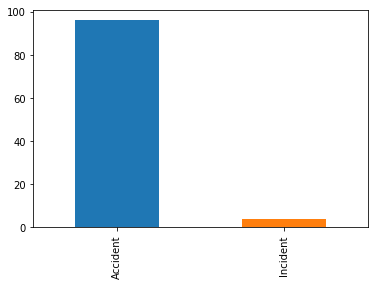

In [15]:
vals = df['Investigation.Type'].value_counts(normalize=True, dropna=False)[:10]*100
vals.plot(kind="bar");

Majority of them are accident, only a small a fraction is incident. 
Look at country again, list the top 10 countries in the dataset:

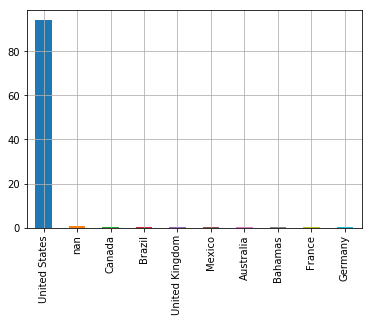

In [16]:
vals = df['Country'].value_counts(normalize=True, dropna=False)[:10]*100
vals.plot(kind="bar");
plt.grid()

More than 90% data are from the United States, followed by Canada, Brazil, United Kindown, and Mexico.

Now let's focus on these accident in the United States with at least one fatality, from data after Jan. 1982. (Data from before this month is not complete).

In [17]:
df['Date'] = pd.to_datetime(df['Event.Date'])
df.drop('Event.Date', axis=1, inplace=True)
df_fatal = df.loc[(df['Total.Fatal.Injuries']>1) &
           (df['Date']>='1982-01') &
           (df['Country'] == 'United States'),
            :]

How each aircaft model contributes to the fatal accidents.

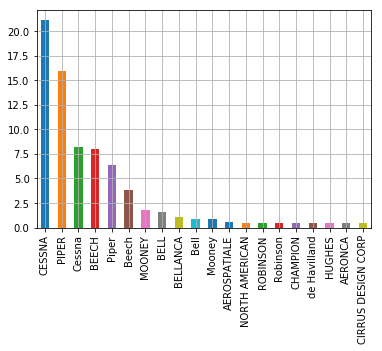

In [18]:
vals = df_fatal['Make'].value_counts(normalize=True, dropna=False)[:20]*100
vals.plot(kind="bar");
plt.grid()

There is issue here, "CESSNA" (all CAPITALIZED) and "Cessna" (Only first letter Capitalized) has been listed as two separate models, so is "PIPER" and "Piper". Let's combined them by change all of them to upper case.

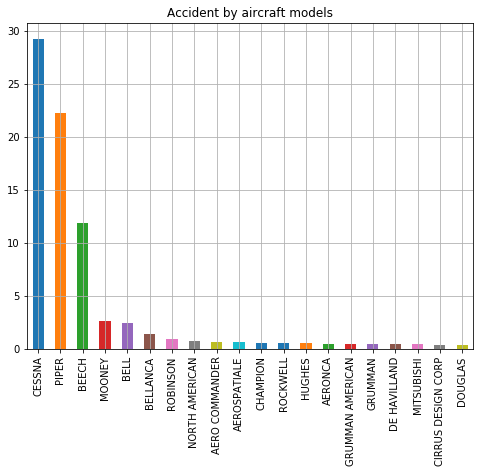

In [19]:
vals = df_fatal['Make'].str.upper().value_counts(normalize=True, dropna=False)[:20]*100
plt.figure(figsize=(8,6))
vals.plot(kind="bar");
plt.grid()
plt.title("Accident by aircraft models")
plt.show()

About 29% fatal accidents from Cessna, another 22% from Piper. 12% from Beech. It is not a surprise since Cessna, Piper Aircraft, and Beechcraft were considered the "Big Three" in the field of general aviation manufacturing.

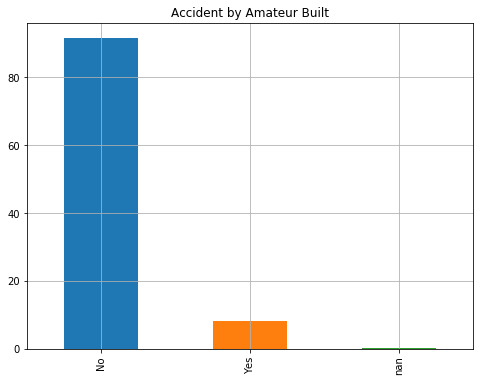

In [20]:
vals = df_fatal['Amateur.Built'].value_counts(normalize=True, dropna=False)*100
plt.figure(figsize=(8,6))
vals.plot(kind="bar");
plt.grid()
plt.title("Accident by Amateur Built")
plt.show()

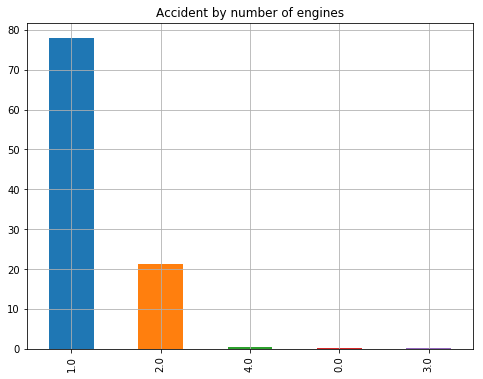

In [21]:
vals = df_fatal['Number.of.Engines'].value_counts(normalize=True, dropna=False)*100
plt.figure(figsize=(8,6))
vals.plot(kind="bar");
plt.grid()
plt.title("Accident by number of engines")
plt.show()

Check the fatal accident and fatality rate during each flight phase

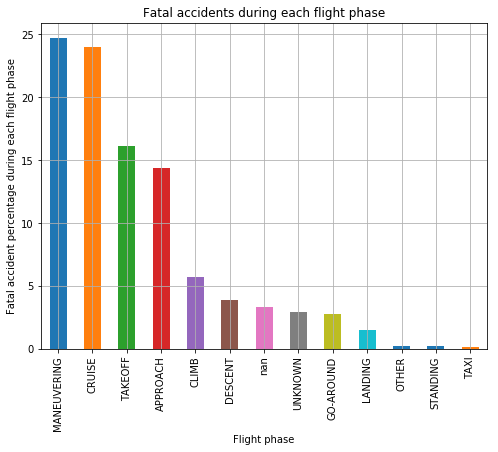

In [26]:
vals = df_fatal['Broad.Phase.of.Flight'].value_counts(normalize=True, dropna=False)*100
plt.figure(figsize=(8,6))
vals.plot(kind="bar");
plt.grid()
plt.title("Fatal accidents during each flight phase")
plt.xlabel("Flight phase")
plt.ylabel("Fatal accident percentage during each flight phase")
plt.show()

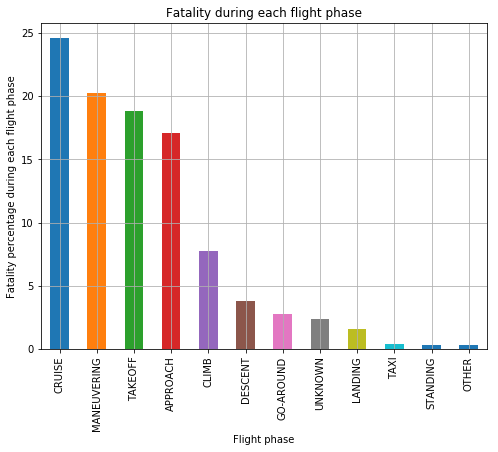

In [31]:
vals = df_fatal.groupby(by='Broad.Phase.of.Flight')['Total.Fatal.Injuries'].sum().sort_values(ascending=False)
plt.figure(figsize=(8,6))
(vals/vals.sum()*100).plot(kind="bar");
plt.grid()
plt.title("Fatality during each flight phase")
plt.xlabel("Flight phase")
plt.ylabel("Fatality percentage during each flight phase")
plt.show()

The year to year Fatality rate

In [34]:
fatal_agg = df_fatal['Total.Fatal.Injuries'].groupby([df_fatal['Date'].dt.year]).agg({'sum','count'})
fatal_agg

,sum,count
Date,,
1982,1264.0,352
1983,921.0,316
1984,889.0,310
1985,1088.0,302
1986,897.0,256
1987,956.0,255
1988,637.0,238
1989,832.0,251
1990,669.0,224


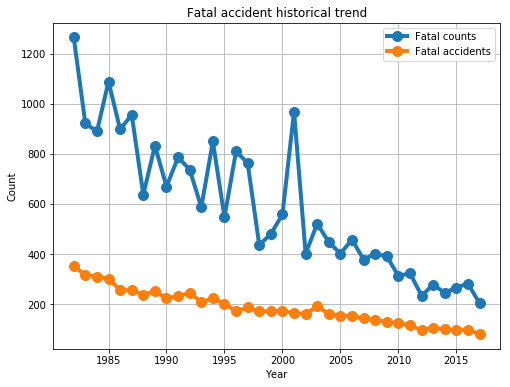

In [35]:
plt.figure(figsize=(8,6))
plt.plot(fatal_agg[['sum','count']], 'o-', lw=4, ms=10 )
plt.legend(('Fatal counts', 'Fatal accidents'))
plt.title('Fatal accident historical trend')
plt.xlabel('Year')
plt.ylabel('Count')
plt.grid()
plt.show()

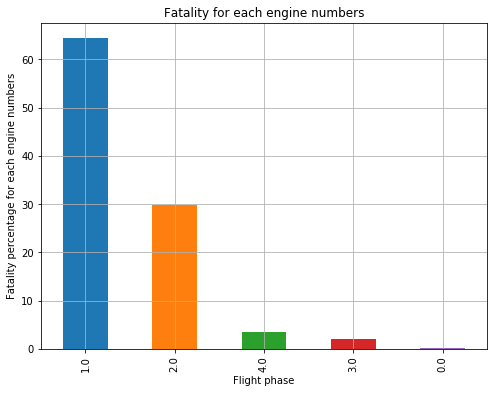

In [37]:
vals = df_fatal.groupby(by='Number.of.Engines')['Total.Fatal.Injuries'].sum().sort_values(ascending=False)
plt.figure(figsize=(8,6))
(vals/vals.sum()*100).plot(kind="bar");
plt.grid()
plt.title("Fatality for each engine numbers")
plt.xlabel("Flight phase")
plt.ylabel("Fatality percentage for each engine numbers")
plt.show()